In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
wine = datasets.load_wine()

In [4]:
df_wine = pd.DataFrame(data = wine.data, columns = wine.feature_names)

In [5]:
df_wine['class'] = wine.target

In [6]:
df_wine.head().T

,0,1,2,3,4
alcohol,14.23,13.20,13.16,14.37,13.24
malic_acid,1.71,1.78,2.36,1.95,2.59
ash,2.43,2.14,2.67,2.50,2.87
alcalinity_of_ash,15.60,11.20,18.60,16.80,21.00
magnesium,127.00,100.00,101.00,113.00,118.00
total_phenols,2.80,2.65,2.80,3.85,2.80
flavanoids,3.06,2.76,3.24,3.49,2.69
nonflavanoid_phenols,0.28,0.26,0.30,0.24,0.39
proanthocyanins,2.29,1.28,2.81,2.18,1.82
color_intensity,5.64,4.38,5.68,7.80,4.32


In [7]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [8]:
df_wine['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_wine.drop('class', axis = 1), df_wine['class'], test_size = 0.3)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn  = KNeighborsClassifier(n_neighbors = 3)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
result = knn.predict(X_test)
result

array([0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 2,
       0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0,
       2, 1, 1, 0, 1, 2, 1, 0, 0, 0])

In [15]:
print(pd.crosstab(y_test, result, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito   0   1   2  All
Real                    
0        15   1   0   16
1         2  10   3   15
2         7   8   8   23
All      24  19  11   54


In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test, result, target_names = wine.target_names))

              precision    recall  f1-score   support

     class_0       0.62      0.94      0.75        16
     class_1       0.53      0.67      0.59        15
     class_2       0.73      0.35      0.47        23

    accuracy                           0.61        54
   macro avg       0.63      0.65      0.60        54
weighted avg       0.64      0.61      0.59        54



In [17]:
from mlxtend.plotting import plot_decision_regions

In [18]:
X = wine.data[:, [0, 2]]
y = wine.target

In [19]:
def plot_borders(neighbors):
  knn = KNeighborsClassifier(n_neighbors = neighbors)
  knn.fit(X, y)
  plt.figure(figsize=(8, 5))
  plot_decision_regions(X, y, clf = knn, legend = 2)
  plt.xlabel('alcohol')
  plt.ylabel('malic_acid')
  plt.title('Fronteiras de complexidade - KNN')

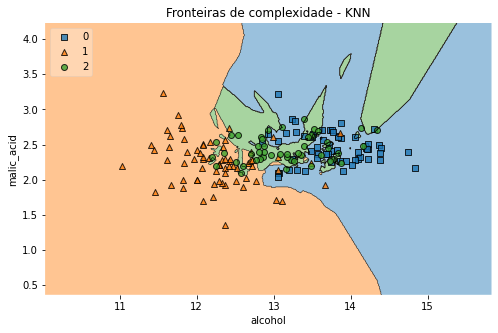

In [20]:
plot_borders(3)